In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from itertools import combinations
from math import ceil

In [10]:
class NBody:
    def __init__(self, Xi = None, masses = None, G = 6.67e-11):
        # Set initial conditions and apply them to self
        self.Xi = Xi
        self.masses = masses
        self.G = G

        self.history = None
    
    def getDiff(self, X):
        # Get gravitational acceleration for each body
        N, D = np.array(X).shape
        D = D//2 # find number of dimensions
        pos = np.array(X)[:, :D] # position vector
        vel = np.array(X)[:, D:] # velocity vector

        Xdot = np.zeros_like(X, dtype = float)
        Xdot[:, :D] = vel
        for bodyI, bodyJ in self.pairs:
            # find force and acceleration of bodies

            r1 = pos[bodyI] # position vector body 1
            r2 = pos[bodyJ] # position vector body 2
            rVec = r2 - r1 # vector between bodies
            r = np.linalg.norm(rVec) # magnitude of vector between bodies
            rUnit = rVec / r # unit vector between bodies

            F = self.G * self.masses[bodyI] * self.masses[bodyJ] * rUnit / r**2
            a1 = F / self.masses[bodyI]
            a2 = -F / self.masses[bodyJ]
            Xdot[bodyI, D:] += a1
            Xdot[bodyJ, D:] += a2
        return Xdot
    
    def rk4(self, X, dt, diff):
        # finding the next pos and velocities

        k1 = diff(X)
        #k2 = diff(X + 0.5 * dt * k1)
        #k3 = diff(X + 0.5 * dt * k2)
        #k4 = diff(X + dt * k3)
        #X_prime = (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        return X + k1 * dt
    
    def runSim(self, T, dt):
        # function to run simulation

        assert self.Xi is not None
        assert self.masses is not None

        iters =  ceil(T/dt)
        N, D = np.array(self.Xi).shape

        self.history = np.zeros((iters + 1, N, D))
        self.history[0] = self.Xi

        self.pairs = list(combinations(range(N), 2))

        X = deepcopy(self.Xi)
        for i in range(iters):
            X = self.rk4(X, dt, self.getDiff)
            self.history[i+1] = X
            if i % 10000 == 0:
                print(i/iters * 100, "percent complete")
        return self.history


## Testing with satellite orbit around earth

In [4]:
def stableEarthOrbit(r):
    # Inputs
    # - r: altitude above Earths surface that satellite is orbiting at
    # Outputs
    # - v: velocity satellite needs to have stable orbit at r

    G = 6.67e-11
    massEarth = 5.97e24
    radEarth = 6.38e6
    return np.sqrt(G * massEarth/(radEarth + r))

In [5]:
massEarth, radEarth = 5.97e24, 6.38e6
r = 760e3 # satellite orbit altitude
X = [[0,0,0,0], # Earth initial conditions (no velocity, no position)
     [radEarth + r, 0,0, stableEarthOrbit(r)]] # satellite initial conditions (starting at altitude r above earth, with velocity defined by stable orbit function)
masses = [massEarth, 250]

In [11]:
twoBody = NBody(Xi = X, masses = masses)
T, dt = 500*60, 1
history = twoBody.runSim(T, dt)

0.0 percent complete
33.33333333333333 percent complete
66.66666666666666 percent complete


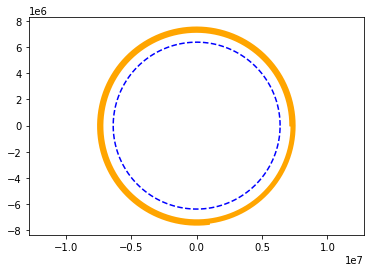

In [12]:
theta = np.linspace(0, 2 * np.pi, 150)
x = radEarth * np.cos(theta)
y = radEarth * np.sin(theta)

xSatellite = history[:, 1, 0]
ySatellite = history[:, 1, 1]

plt.plot(x, y, '--', color = 'blue')
plt.plot(xSatellite, ySatellite, color = 'orange')
plt.axis("equal")
plt.show()

## Testing with Earth Moon system

In [8]:
moonDist = 384.4e6
earthMoonMass = [5.972e24, 7.348e22]
initialConditions = [[0,0,0,0],
                     [radEarth + moonDist, 0, 0, 1.022e3]]

In [13]:
earthMoon = NBody(Xi = initialConditions, masses = earthMoonMass)
T, dt = 60*24*60*60, 2
earthMoonHistory = earthMoon.runSim(T, dt)

0.0 percent complete


0.38580246913580246 percent complete
0.7716049382716049 percent complete
1.1574074074074074 percent complete
1.5432098765432098 percent complete
1.9290123456790123 percent complete
2.314814814814815 percent complete
2.700617283950617 percent complete
3.0864197530864197 percent complete
3.4722222222222223 percent complete
3.8580246913580245 percent complete
4.243827160493828 percent complete
4.62962962962963 percent complete
5.015432098765432 percent complete
5.401234567901234 percent complete
5.787037037037037 percent complete
6.172839506172839 percent complete
6.558641975308642 percent complete
6.944444444444445 percent complete
7.330246913580248 percent complete
7.716049382716049 percent complete
8.101851851851851 percent complete
8.487654320987655 percent complete
8.873456790123457 percent complete
9.25925925925926 percent complete
9.645061728395062 percent complete
10.030864197530864 percent complete
10.416666666666668 percent complete
10.802469135802468 percent complete
11.1882716

PermissionError: [Errno 13] Permission denied: 'earthMoonOrbit.pdf'

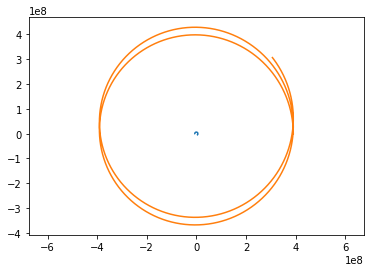

In [19]:
xMoon = earthMoonHistory[:,1,0]
yMoon = earthMoonHistory[:,1,1]

plt.plot(x, y, '--')
plt.plot(xMoon, yMoon)
plt.axis('equal')
plt.savefig('earthMoonOrbit.pdf')
plt.show()

## Testing with Sun Earth Moon system

In [15]:
def orbitalVel(m, r, G = 6.67e-11):
    return np.sqrt(G * m / r)

In [16]:
masses = [1.989e30, 5.972e+24, 7.348e+22]
rEarthMoon, rEarthSun = 384.4e6, 147.64e9
moonOrbitVel = orbitalVel(5.872e24, rEarthMoon)
earthOrbitVel = orbitalVel(1.989e30, rEarthSun)

In [17]:
initial_conditions = [[0,0,0,0],
                      [rEarthSun,0,0,earthOrbitVel],
                      [rEarthSun + rEarthMoon,0,0,earthOrbitVel + moonOrbitVel]]

In [18]:
solarSytem = NBody(Xi = initial_conditions, masses = masses)
T, dt = 365*24*60*60, 2
solSysHistory = solarSytem.runSim(T, dt)

0.0 percent complete


0.06341958396752917 percent complete
0.12683916793505834 percent complete
0.1902587519025875 percent complete
0.2536783358701167 percent complete
0.31709791983764585 percent complete
0.380517503805175 percent complete
0.4439370877727042 percent complete
0.5073566717402334 percent complete
0.5707762557077625 percent complete
0.6341958396752917 percent complete
0.6976154236428209 percent complete
0.76103500761035 percent complete
0.8244545915778791 percent complete
0.8878741755454084 percent complete
0.9512937595129376 percent complete
1.0147133434804667 percent complete
1.0781329274479958 percent complete
1.141552511415525 percent complete
1.2049720953830543 percent complete
1.2683916793505834 percent complete
1.3318112633181125 percent complete
1.3952308472856418 percent complete
1.458650431253171 percent complete
1.5220700152207 percent complete
1.5854895991882292 percent complete
1.6489091831557583 percent complete
1.7123287671232876 percent complete
1.7757483510908167 percent comple

In [20]:
sunX, sunY = solSysHistory[:,0,0], solSysHistory[:,0,1]
earthX, earthY = solSysHistory[:,1,0], solSysHistory[:,1,1]
moonX, moonY = solSysHistory[:,2,0], solSysHistory[:,2,1]


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


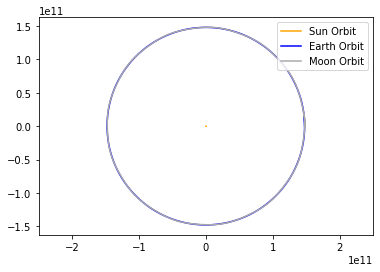

In [21]:
plt.plot(sunX, sunY, color = 'orange', label = 'Sun Orbit')
plt.plot(earthX, earthY, color = 'blue', label = 'Earth Orbit')
plt.plot(moonX, moonY, color = 'darkgrey', label = "Moon Orbit")
plt.legend()
plt.axis("equal")
plt.savefig("sunEarthMoonorbit.pdf")
plt.show()